<a href="https://colab.research.google.com/github/ArinaIva/ML/blob/master/LabRab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cvlib

In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
import os
from google.colab import drive
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import img_to_array
import cvlib as cv
from keras.models import load_model
from PIL import Image

drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
npz = np.load('/content/drive/MyDrive/image.npz')
images, genders = npz['images'], npz['genders']

npz = np.load('/content/drive/MyDrive/imdb_dataset.npz')
images = np.append(images, npz['images'], axis=0)
genders = np.append(genders, npz['genders'], axis=0)

imX, imY = images.shape[1], images.shape[2]

del npz

images = images/255.0
images = images.reshape(images.shape[0], imX, imY, 1)

In [ ]:
train_size = int(images.shape[0]*0.85)
test_size = -train_size + images.shape[0]

(train_img, test_img, train_gen, test_gen) = train_test_split(images, genders, test_size=test_size, train_size=train_size)
train_gen = to_categorical(train_gen, num_classes=2) 
test_gen = to_categorical(test_gen, num_classes=2)

splited = np.split(genders, [train_size, test_size])
train_gen_one, test_gen_one = splited[0], splited[1]




In [ ]:
male = 1
female = 0

In [ ]:
# females, males
stats = [0, 0]
for i in range(train_size):
    stats[train_gen_one[i]] +=1
stats

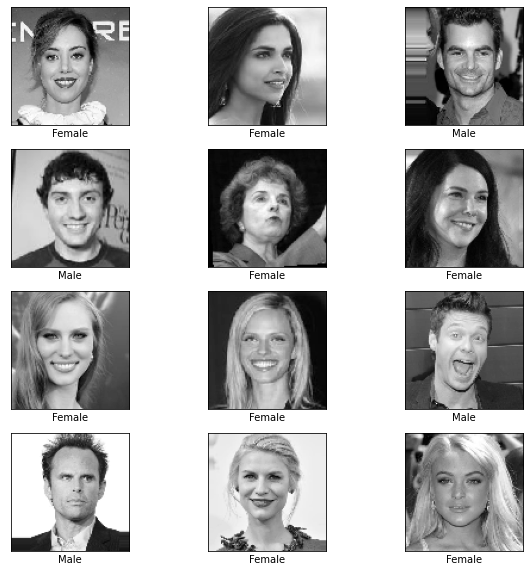

In [ ]:
sizeX = 4
sizeY = 3
size = sizeX*sizeY
indices = np.random.choice(range(images.shape[0]), size=size)

plt.figure(figsize=(10,10))
for i, j in enumerate(indices):
    gender = 'Male' if genders[j]==male else 'Female'
    
    plt.subplot(sizeX,sizeY, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[j].reshape(imX, imY), cmap=plt.get_cmap('gray'))
    plt.xlabel(f'{gender}')
plt.show()


In [ ]:
batch_size = 200
epochs = 8

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(imX, imY, 1)),
    #tf.keras.layers.SpatialDropout2D(0.5),
    tf.keras.layers.AveragePooling2D((4, 4)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    #tf.keras.layers.SpatialDropout2D(0.5),
    tf.keras.layers.AveragePooling2D((4, 4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       1280      
_________________________________________________________________
average_pooling2d (AveragePo (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
history = model.fit(train_img, train_gen, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

Epoch 1/8
182/182 [==============================] - 602s 3s/step - loss: 0.6424 - accuracy: 0.6079 - val_loss: 0.4222 - val_accuracy: 0.8142
Epoch 2/8
182/182 [==============================] - 606s 3s/step - loss: 0.4303 - accuracy: 0.8128 - val_loss: 0.3698 - val_accuracy: 0.8382
Epoch 3/8
182/182 [==============================] - 603s 3s/step - loss: 0.3370 - accuracy: 0.8618 - val_loss: 0.2751 - val_accuracy: 0.8884
Epoch 4/8
182/182 [==============================] - 601s 3s/step - loss: 0.2694 - accuracy: 0.8954 - val_loss: 0.2685 - val_accuracy: 0.8894
Epoch 5/8
182/182 [==============================] - 606s 3s/step - loss: 0.2316 - accuracy: 0.9124 - val_loss: 0.1864 - val_accuracy: 0.9297
Epoch 6/8
182/182 [==============================] - 603s 3s/step - loss: 0.1988 - accuracy: 0.9278 - val_loss: 0.1870 - val_accuracy: 0.9315
Epoch 7/8
182/182 [==============================] - 603s 3s/step - loss: 0.1837 - accuracy: 0.9327 - val_loss: 0.1815 - val_accuracy: 0.9305
Epoch 

In [ ]:
print('Точнось на обучающей выборке {0}'.format(history.history['accuracy'][-1]))
result = model.evaluate(test_img, test_gen, verbose=0)
print('Точнось на тестовой выборке {0}'.format(result[1]))


Точнось на обучающей выборке 0.938318133354187
Точнось на тестовой выборке 0.9437666535377502


In [ ]:
imageB=cv2.imread('ar.jpg',0)
imageB = cv2.resize(imageB, (100,100))
cv2.imwrite('d100.jpg', imageB)
imageB = imageB/255
imageB = imageB.reshape(1, 100, 100, 1)

In [ ]:
model.predict([imageB])

array([[0.00106511, 0.9989349 ]], dtype=float32)

In [ ]:
model.save('/content/drive/MyDrive/DETECTOR.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DETECTOR.model/assets


In [ ]:
model = load_model('/content/drive/MyDrive/DETECTOR.model')

In [ ]:
#Детектор лица для одной фотки
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread('ar.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
cv2.imwrite('ars0.jpg', img)

True

In [ ]:
def get_gender(y):
   
   if y[0][male] > y[0][female]:
     return y[0][male], "Male"
   else:
     return y[0][female], "Female"


In [ ]:
#Загрузка изображений с диска
def get_images_and_labels(path):
    image_paths = [os.path.join(path, f) for f in os.listdir(path)]
    images = []
    labels = []
    for image_path in image_paths:
        image_pil = Image.open(image_path).convert('L')
        
        image_pil = np.asarray(image_pil.resize((100,100)))
        labels.append(model.predict([image_pil.reshape(1, 100, 100, 1)]))
        images.append(image_pil)
        cv2.waitKey(50)
    return images, labels

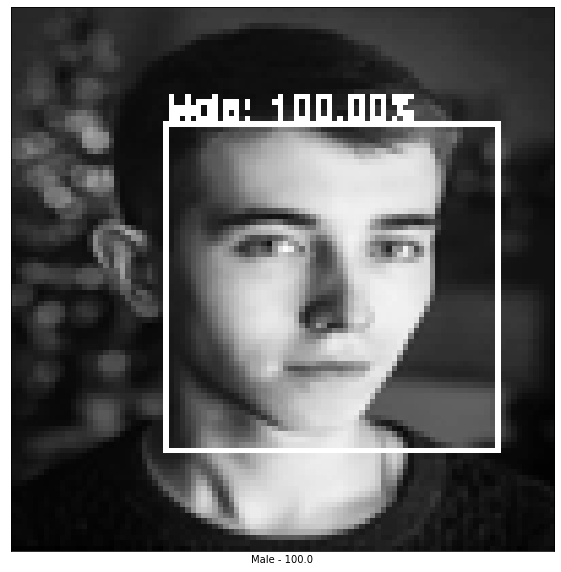

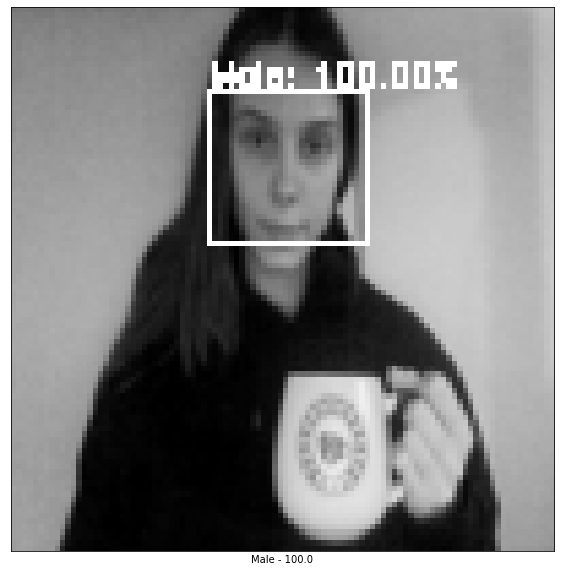

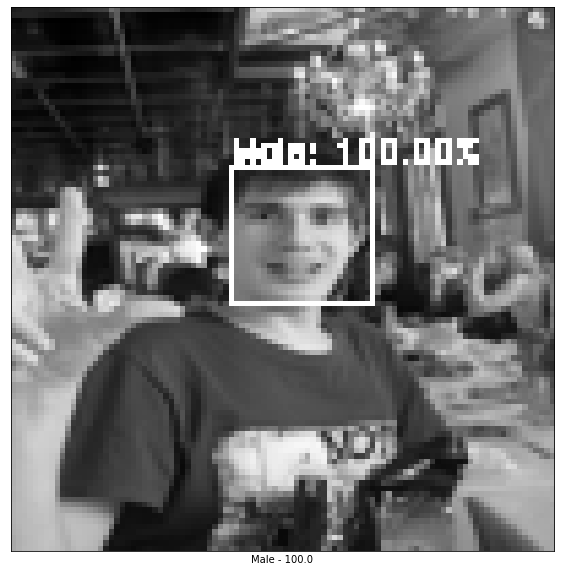

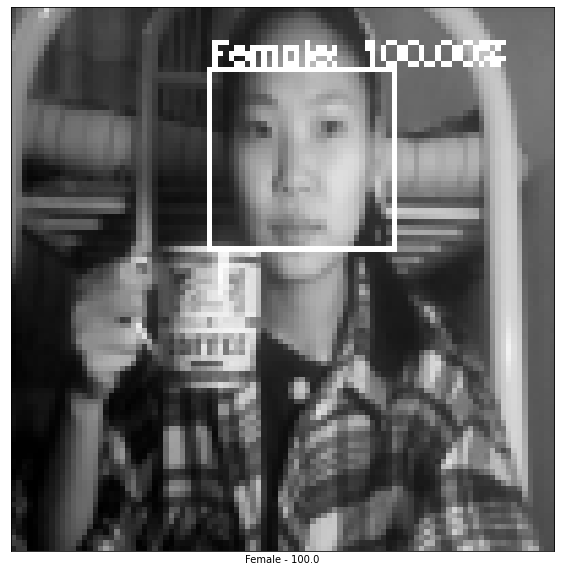

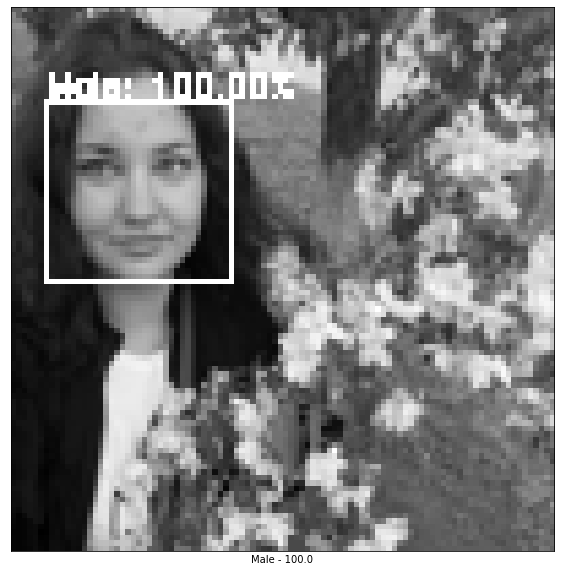

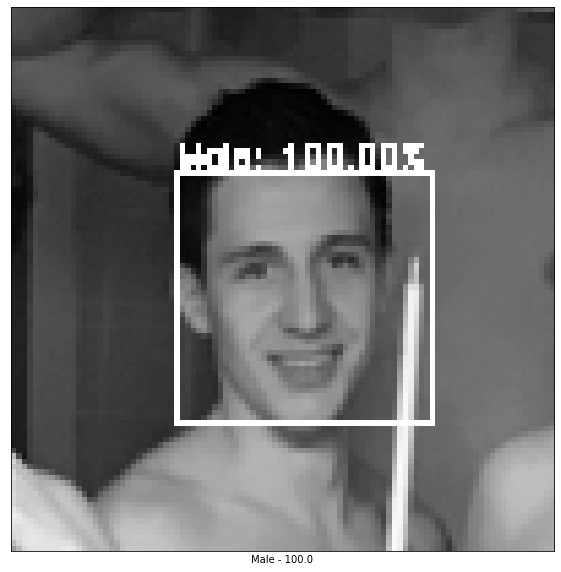

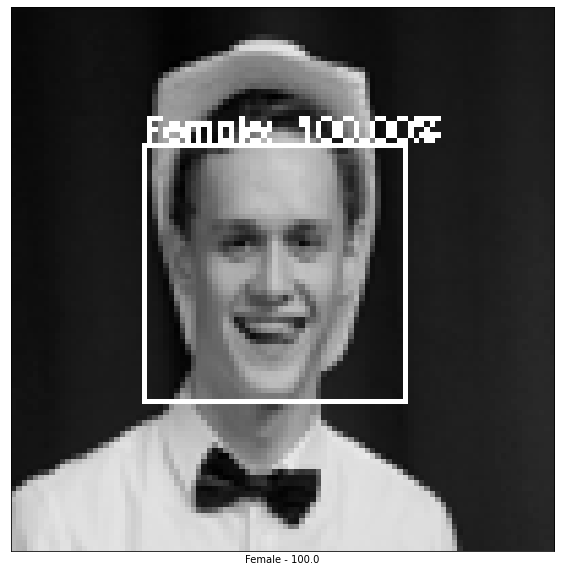

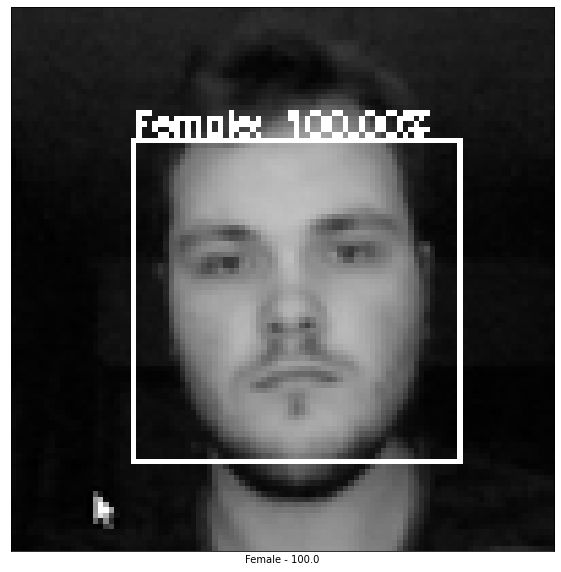

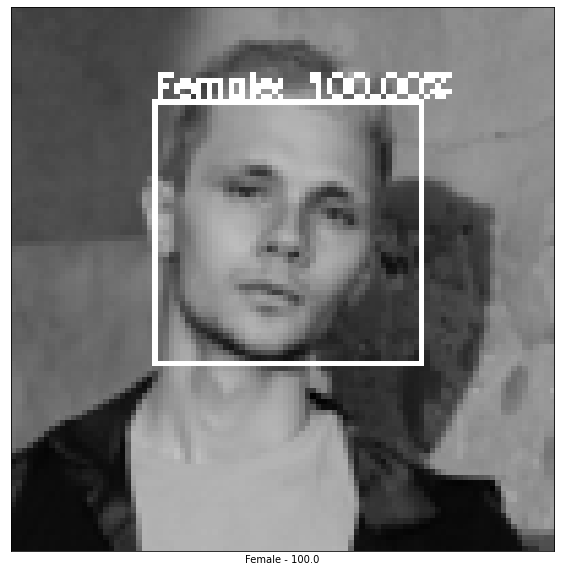

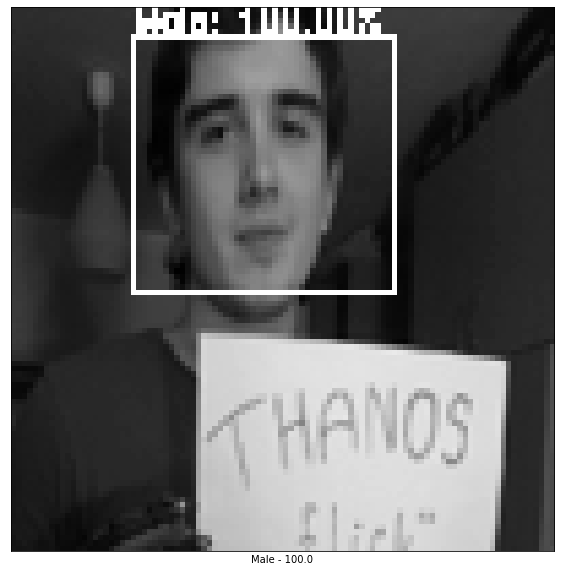

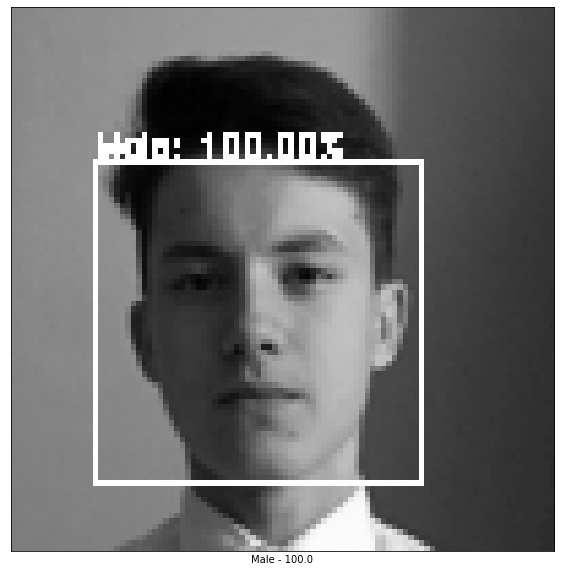

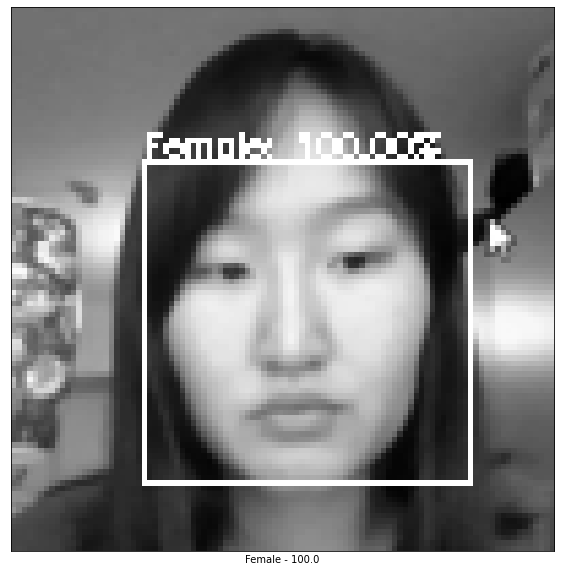

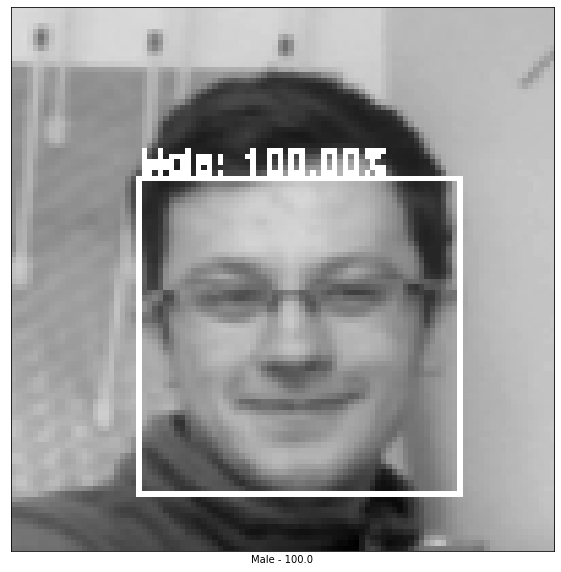

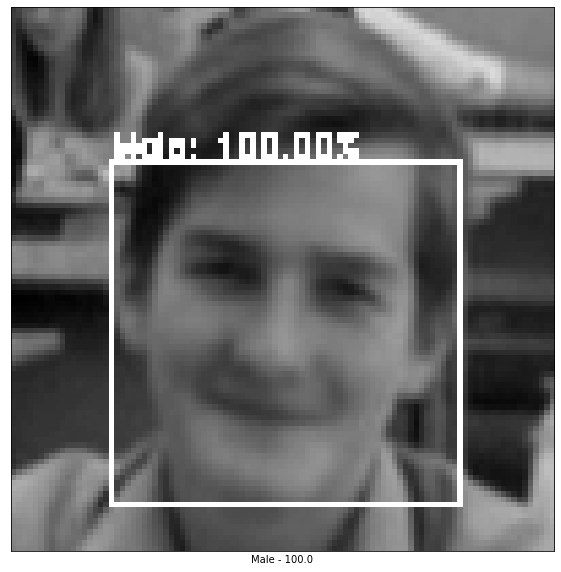

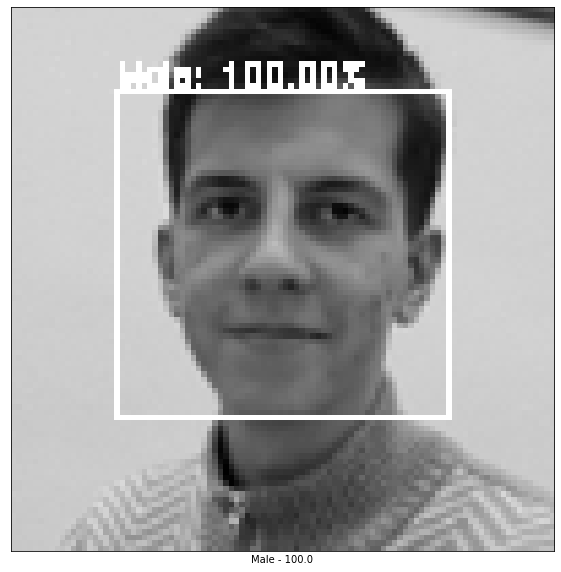

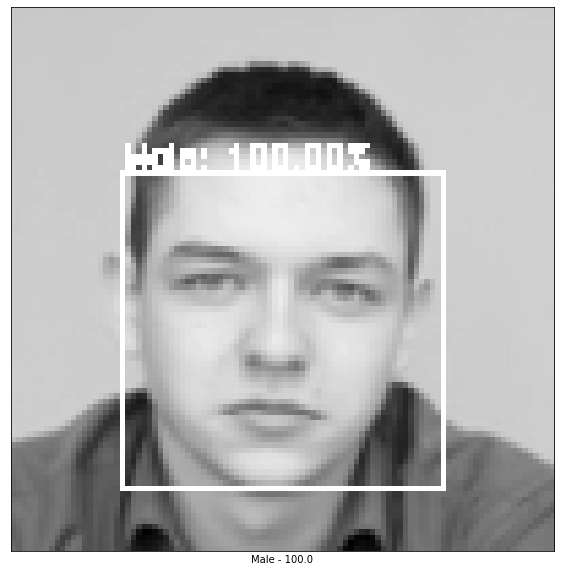

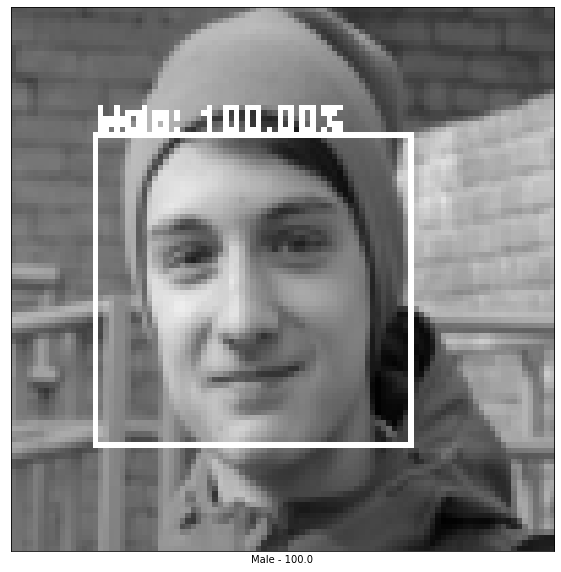

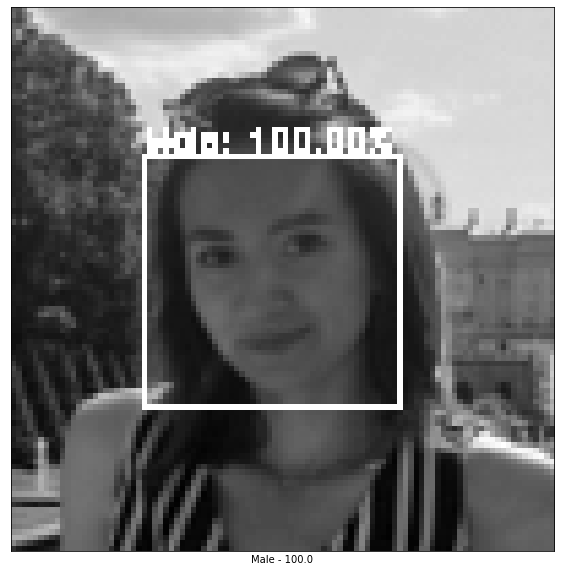

In [ ]:
from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

path = '/content/drive/MyDrive/Data' 
images, labels = get_images_and_labels(path)
for i in range(labels.__len__()):
  probability, gender = get_gender(labels[i])
  faces = face_cascade.detectMultiScale(images[i], 1.3, 5)
  img = images[i]
  for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y+1),(x+w,y+h),(255,0,0),1)
    label = "{}: {:.2f}%".format(gender, probability * 100)
    cv2.putText(img, label, (x, y),  cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 0, 0), 1)
    
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.asarray(img), cmap=plt.get_cmap('gray'))
    plt.xlabel(f'{gender} - {probability*100}')
  plt.show()
